# Branching process

One way to understand and visualize a [branching process](https://en.wikipedia.org/wiki/Branching_process) is as a growing tree. The process starts at at time (or generation) $t = 0$ with $n_0$ nodes. At time $t$, the $n_t$ *parent* nodes each generates independently a certain number $k$ of descendents (*child* nodes) according to some *offspring* distribution $q_k$. These $n_{t+1}$ child nodes become the new parent nodes at generation $t+1$ and the process goes on forever, or until there are no more descendents at the next generation (which corresponds to an *extinction* event). Below is illustrated an example of a branching process with each node labeled by its generation.

![branching](assets/png/branching.png)

This growing tree could model various situation: reproduction of bacteria, the spread of surnames, or more closely related to the main subject of this tutorial---the spread of an infectious disease in a population.

Some questions of interest are:
1. What is the number of nodes at time $t$?
2. What is the *cumulative* number of nodes at time $t$?
3. What is the probability of extinction given some initial conditions?

Of course, to answer these questions, we will use probability generating functions. 

## Number of nodes at a given generation

Let us define $p_{n_t}$ the probability to have $n_t$ nodes at time $t$ and its PGF $G_t(x) = \sum_{n_t = 0}^\infty p_{n_t} x^{n_t}$. Let us also define $Q(x) = \sum_{k = 0}^\infty q_k x^k$ the PGF of the offspring distribution.
Assuming we have $n_t$ nodes, each of them will produce *independently* some number of descendents, so the PGF for the sum of these descendent is simply $Q(x)^{n_t}$ by the properties of PGF. Since $n_t$ is also a random variable, we have that

$$
\begin{align}
G_{t+1}(x) &= \sum_{n_t=0}^\infty p_{n_t} Q(x)^{n_t} \;, \\
           &= G_t(Q(x)) \;.
\end{align}
$$

By recursion, we have that

$$
\begin{align}
G_{t}(x) &= G_0(Q^t(x)) \;,
\end{align}
$$

where $Q^t(x) \equiv \underbrace{Q \circ Q \circ \cdots Q}_{t \text{ times}}$ is the $t$-composition of $Q$ with itself and $G_0(x)$ represents the initial conditions.

For instance, let us consider a Poisson distribution $q_k = \lambda^k e^{-\lambda} / k!$ with PGF $Q(x) = e^{\lambda (x - 1)}$ with $\lambda = 2$, and let us assume initially there were 5 nodes, i.e., $G_0(x) = x^{5}$. Below we compute and illustrate the distribution for the number of nodes at certain generations.

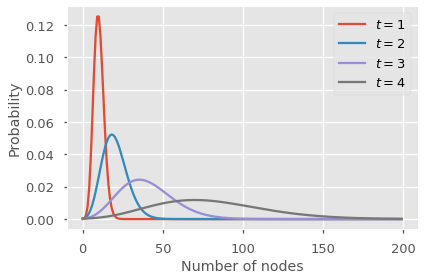

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

Q = lambda x: np.exp(2*(x-1))
G0 = lambda x: x**5
N = 200
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
x = c.copy()
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = Q(x)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()

At each generation, the mean of the distribution increases by a factor $\lambda = 2$ and the distribution gets broader due to the stochasticity.

## Cumulative number of nodes

Sometimes, we care more about total size of the tree; for an epidemic process, it would be the total size of the outbreak.
To characterize, $m_t$, the cumulative number of node at time $t$, we need to consider the joint distribution $p_{n_t,m_t}$ with bivariate PGF

$$
\begin{align}
G_{t}(x,y)  &= \sum_{n_t=0}^\infty \sum_{m_t=0}^\infty p_{n_t,m_t} x^{n_t}y^{m_t} \;.
\end{align}
$$

The PGF $G_t(x,y)$ follows a very similar update pattern as $G_t(x)$. In fact, if we take any node at generation $t$, the number of descendent *and* the cumulative number of node it produces is the same, therefore, its PGF is $Q(xy)$. So the PGF for the sum of descendent and cumulative number of nodes produced at generation $t$ is $Q(xy)^{n_t}$. Therefore, we have

$$
\begin{align}
G_{t+1}(x,y)  &= \sum_{n_{t}=0}^\infty \sum_{m_{t}=0}^\infty p_{n_{t},m_{t}} Q(xy)^{n_{t}}y^{m_{t}} \;, \\
G_{t+1}(x,y)  &= G_t(Q(xy),y) \;.
\end{align}
$$

Now we could extract the joint distribution $p_{n_t,m_t}$ from this bivariate PGF, but if we only care about the cumulative number of node, we can marginalize on $n_t$ by replacing $x \mapsto 1$ in the previous equation. Indeed, replacing a variable by 1 in a PGF is equivalent to marginalize over the underlying quantity it represents (here $n_t$). Similarly, if we substitute $y \mapsto 1$ in the equation for $G_{t+1}(x,y)$, we recover the previous recursion for $G_{t+1}(x)$, since we marginalize over $m_t$.

:::{note}
The initial conditions are now specified by the PGF $G_0(x,y)$. With 5 nodes at $t = 0$, this implies $G_0(x,y) = x^5y^5$.
:::

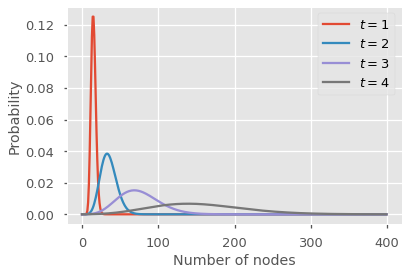

In [2]:
Q = lambda x: np.exp(2*(x-1))
G0 = lambda x,y: x**5*y**5
N = 400
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
y = c.copy()
x = np.ones_like(c)
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x,y))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = Q(x*y)
    y = y
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()

## Probability of extinction

Given some initial conditions specified by $G_0(x)$ and an offspring PGF $Q(x)$ (or $G_0(x,y)$ and $Q(xy)$), we want to know the probability that the process will go extinct. Since all nodes generate descendents independently, we can ask the simpler question: What is the probability $u$ that a node has a finite number of descendents. Assuming this is the case, since all descendents also generate child nodes independently, it must be that all descendent also have a finite number of descendent, with probability $u$. Since the number of descendent is given by the distribution $q_k$,

$$
\begin{align}
u &= \sum_k q_k u^k \;, \\
  &= Q(u) \;.
\end{align}
$$

One can see that $u = 1$ is always a solution of this self-consistent equation, but sometime there is another solution $u < 1$.
To find this solution, one can just start with some initial value $u < 1$ and iterate the equation.
The probability of extinction is then simply the probability that all initial nodes have a finite number of descendent, i.e., $G_0(u)$, which is also smaller than 1.

Below, we solve for the probability of extinction using different values of $\lambda$ for the Poisson distribution. The probability of extinction is smaller than one when $\lambda > 1$, so when on average, a nodes generates more than one descendent.

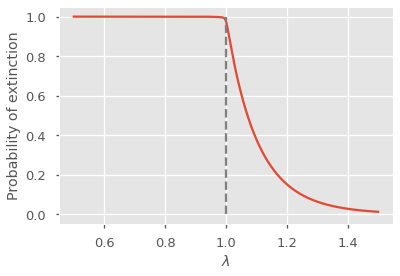

In [3]:
Q = lambda l,x: np.exp(l*(x-1)) #l -> lambda
G0 = lambda x: x**5
llist = np.linspace(0.5,1.5,1000)
usol = []
Pext = []
for l in reversed(llist):
    u1 = usol[-1].copy() if usol else 0.5
    u2 = Q(l,u1)
    while  abs(u2-u1) > 10**(-5):
        u1 = u2.copy()
        u2 = Q(l,u1)
    usol.append(u2)
    Pext.append(G0(u2))
Pext = list(reversed(Pext))
plt.plot(llist,Pext)
plt.vlines(1,0,1,ls='--',color='grey')
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Probability of extinction")
plt.show()

:::{tip}
When solving this type of self-consistent equation and scanning a paramater (here $\lambda$) it is useful to reuse the result from the previous value of $\lambda$ to solve for the next one (it saves a lot of computation). Here, it is better to start at the end (large $\lambda$) to avoid numerical issues---one is invited to try it the other way around and see what happens.
:::